<a href="https://colab.research.google.com/github/deepikareddy0707/projects/blob/main/spam_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc
from collections import Counter

data = files.upload()

Saving spam.csv to spam (2).csv


In [60]:
spam_df=pd.read_csv("spam (1).csv")

In [31]:
print(spam_df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [32]:
print(spam_df.groupby('Category').describe())

         Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4  


In [33]:
spam_df['spam']=spam_df['Category'].apply(lambda x:1 if x=='spam' else 0)

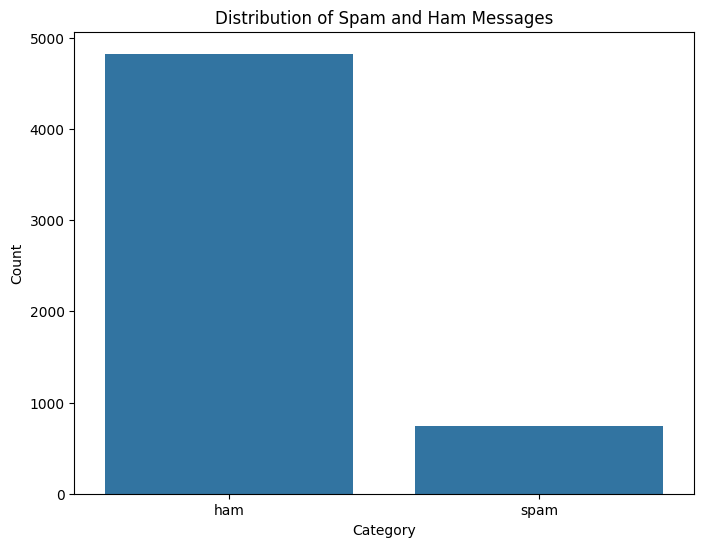

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='Category',data=spam_df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

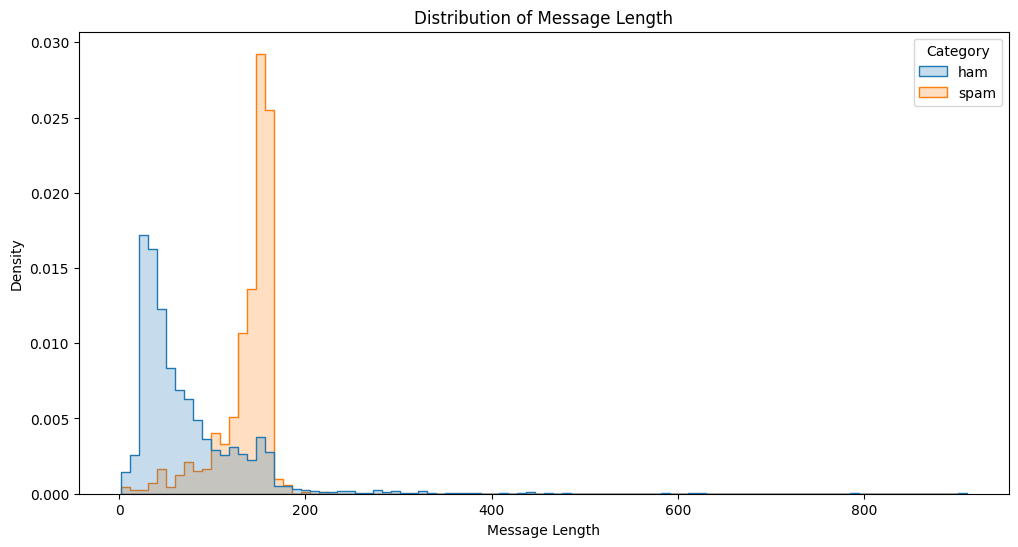

In [36]:
spam_df['messages_length']=spam_df['Message'].apply(len)
plt.figure(figsize=(12,6))
sns.histplot(data=spam_df,x='messages_length',hue='Category',element='step',stat='density',common_norm=False)
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.show()

In [37]:
def get_top_n_words(corpus, n=None):
  vec=CountVectorizer().fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]

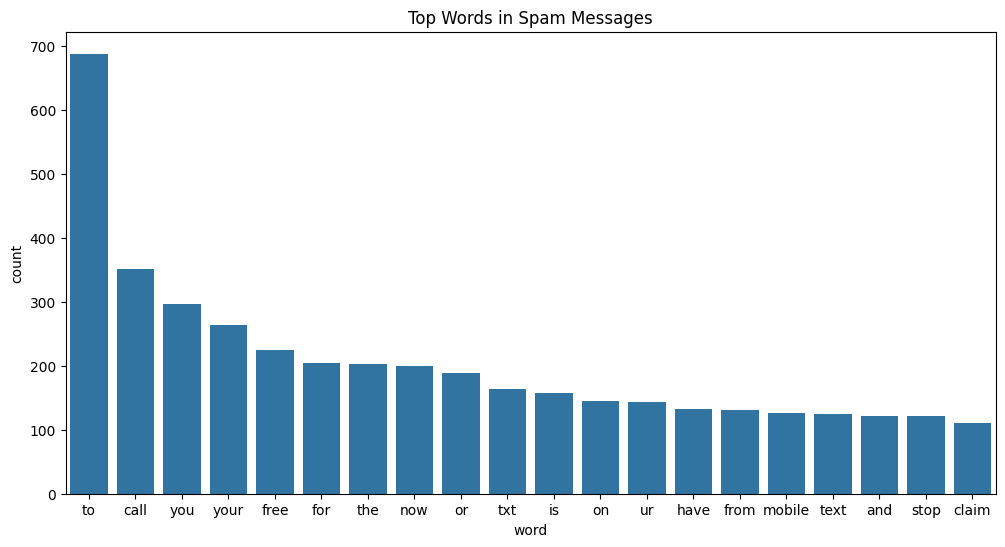

In [38]:
spam_words=get_top_n_words(spam_df[spam_df['Category']=='spam']['Message'],20)
spam_df_top_words=pd.DataFrame(spam_words,columns=['word','count'])
plt.figure(figsize=(12,6))
sns.barplot(x='word',y='count',data=spam_df_top_words)
plt.title('Top Words in Spam Messages')
plt.show()

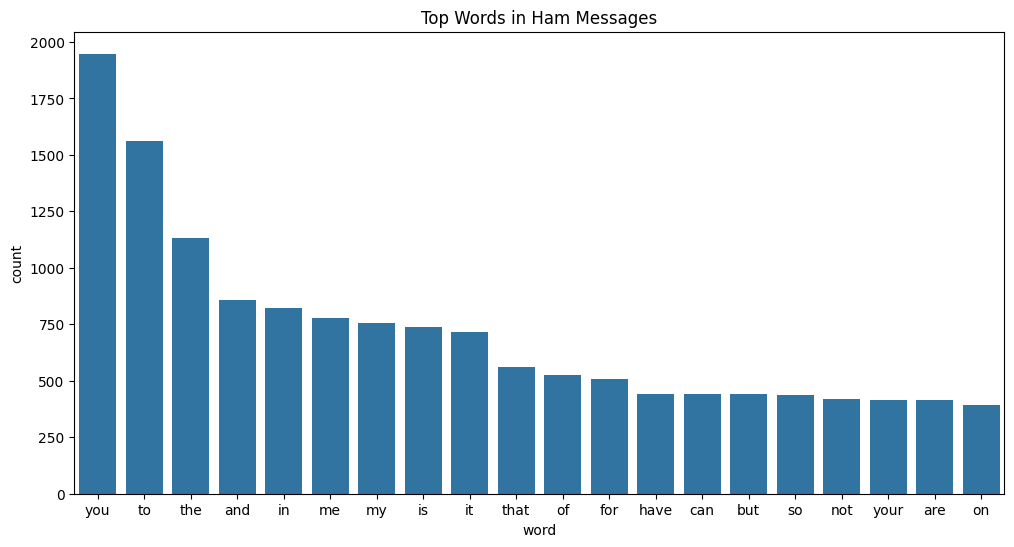

In [39]:
ham_words=get_top_n_words(spam_df[spam_df['Category']=='ham']['Message'],20)
ham_df_top_words=pd.DataFrame(ham_words,columns=['word','count'])
plt.figure(figsize=(12,6))
sns.barplot(x='word',y='count',data=ham_df_top_words)
plt.title('Top Words in Ham Messages')
plt.show()

In [41]:
x_train,x_test,y_train,y_test=train_test_split(spam_df['Message'],spam_df['spam'],test_size=0.2,random_state=42)

In [42]:
print(x_train.describe())

count                       4457
unique                      4166
top       Sorry, I'll call later
freq                          21
Name: Message, dtype: object


In [43]:
cv=CountVectorizer()

In [44]:
x_train_count=cv.fit_transform(x_train.values)

In [45]:
print(x_train_count.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
model=MultinomialNB()

In [47]:
model.fit(x_train_count,y_train)

MultinomialNB()

In [48]:
email_ham=["Do we have college tomorrow?"]
email_ham_count=cv.transform(email_ham)
ham_prediction=model.predict(email_ham_count)
print(f"Ham Prediction: {ham_prediction} (0 indicates ham)")

Ham Prediction: [0] (0 indicates ham)


In [49]:
x_test_count=cv.transform(x_test)


In [50]:
accuracy=model.score(x_test_count,y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 99.19%


In [51]:
y_pred=model.predict(x_test_count)

In [52]:
cm=confusion_matrix(y_test,y_pred)

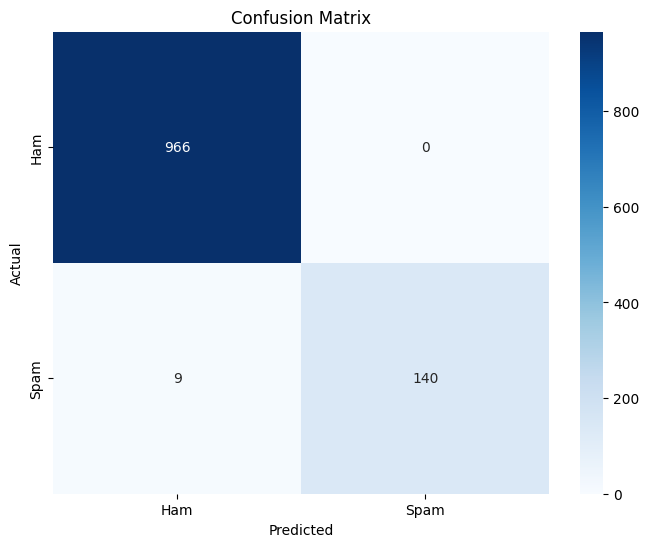

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
fpr,tpr,_=roc_curve(y_test,model.predict_proba(x_test_count)[:,1])
roc_auc=auc(fpr,tpr)

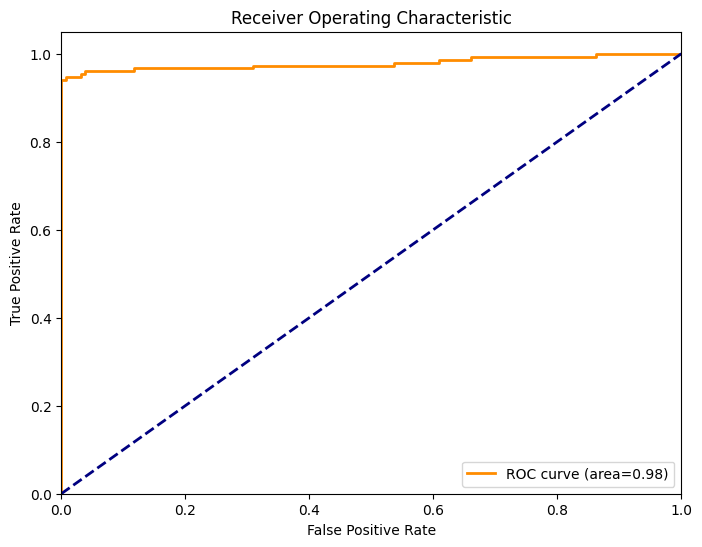

In [59]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (area={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
